---
## **Import Necessary Libraries**
---


In [145]:
import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.pipeline import Pipeline

---
## **Mounting Drive for the dataset**
---






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/ #specify your path

/content/drive/My Drive


In [ ]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

---
# **Data Preprocessing**
-----------------



*   Focussing upon Brand Names
*   Correcting Typos
*   Assigning a category for each price range





In [ ]:
df['brand'] = df.CarName.str.split(' ').str.get(0).str.lower()

In [ ]:
df.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
df['brand'] = df['brand'].replace(['vw', 'vokswagen'], 'volkswagen')
df['brand'] = df['brand'].replace(['maxda'], 'mazda')
df['brand'] = df['brand'].replace(['porcshce'], 'porsche')
df['brand'] = df['brand'].replace(['toyouta'], 'toyota')

In [ ]:
df.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
brand_price=df[['price','brand']].groupby('brand',as_index= False ).mean().rename(columns={'price':'brand_avg_price'})
df = df.merge(brand_price, on = 'brand')

In [ ]:
df['brand_category'] = df['brand_avg_price'].apply(lambda x : "Budget" if x < 10000
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

In [ ]:
df.brand_category.value_counts()

brand_category
Budget       95
Mid_Range    86
Luxury       24
Name: count, dtype: int64

In [ ]:
df.drop(['car_ID', 'symboling', 'CarName'],axis = 1, inplace = True)

In [ ]:
catcol = [col for col in df.columns if df[col].dtype=="O"]
catcol


['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'brand',
 'brand_category']

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[catcol])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(catcol))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(catcol, axis=1)

In [ ]:
df_encoded.head()


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo,brand_category_Budget,brand_category_Luxury,brand_category_Mid_Range
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_encoded.dtypes


wheelbase                   float64
carlength                   float64
carwidth                    float64
carheight                   float64
curbweight                    int64
                             ...   
brand_volkswagen            float64
brand_volvo                 float64
brand_category_Budget       float64
brand_category_Luxury       float64
brand_category_Mid_Range    float64
Length: 78, dtype: object

---
# **Exploratory Data Analysis (EDA)**
---

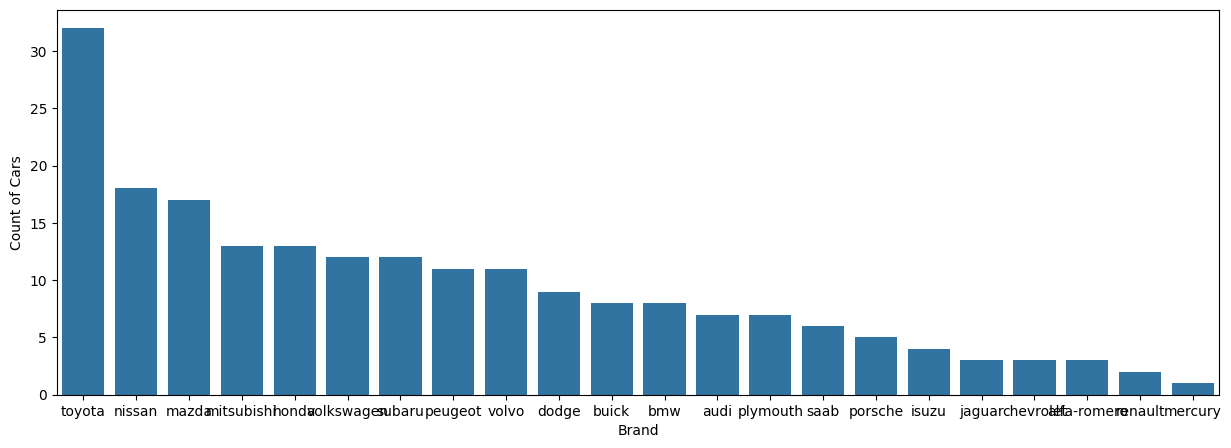

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(x=df['brand'], order=pd.value_counts(df['brand']).index)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()

<Axes: ylabel='brand_avg_price'>

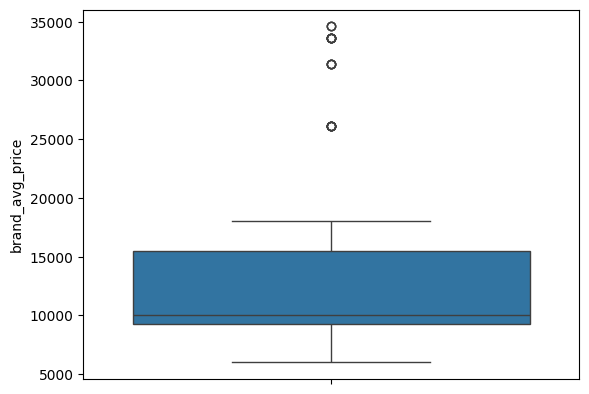

In [ ]:
sns.boxplot(df['brand_avg_price'])

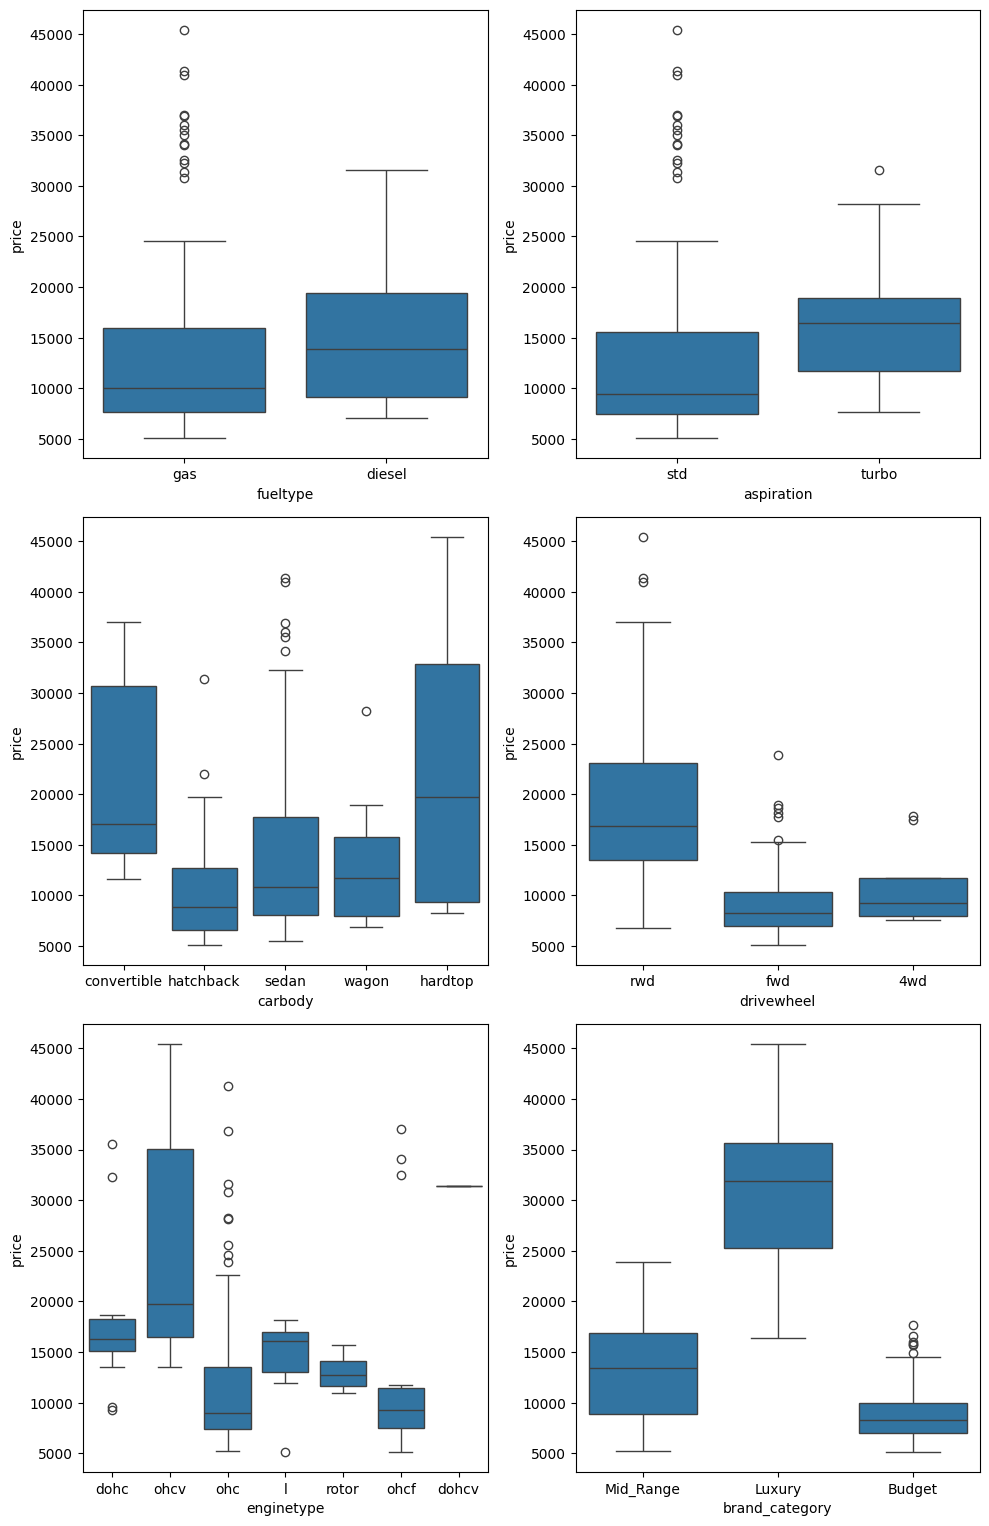

In [ ]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = df)
plt.tight_layout()
plt.show()

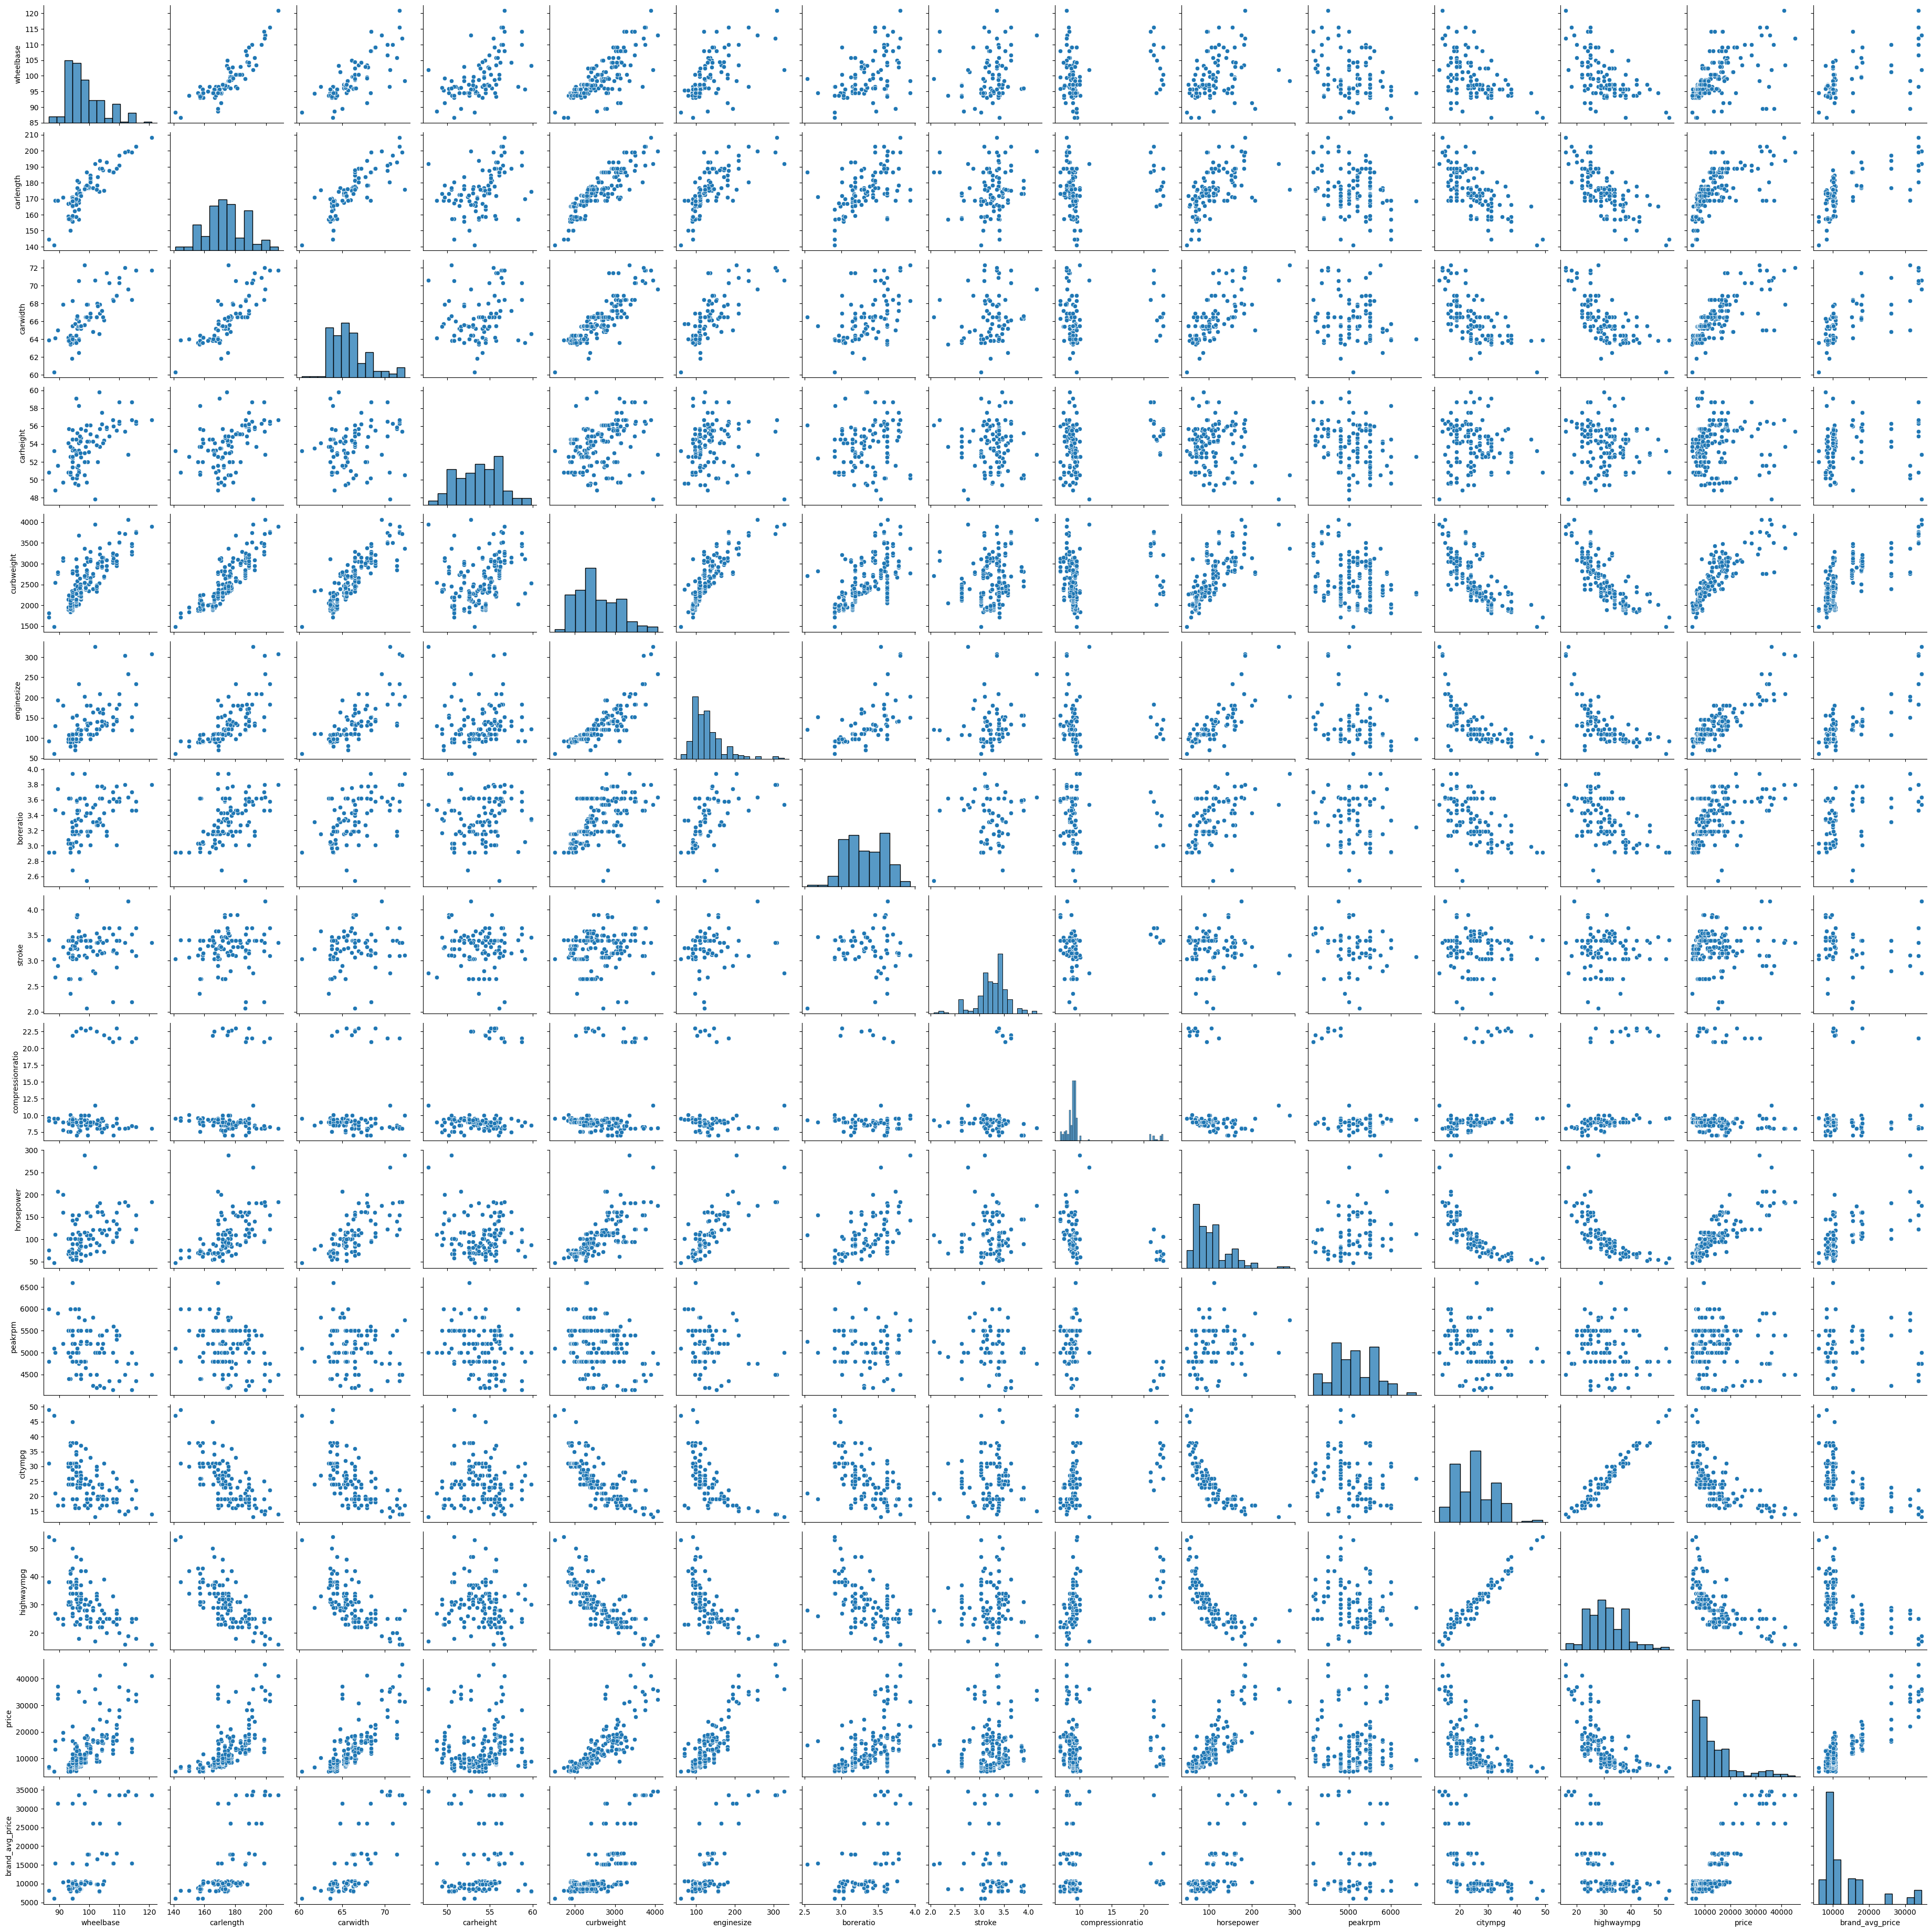

In [131]:
sns.pairplot(df)

---
# **Model Building**

---
*   KFold
*   Standard Scaler
*   Polynomial Features



In [ ]:
df_x=df_encoded.drop("brand_avg_price",axis=1)
df_y=df_encoded.brand_avg_price

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,random_state=4,test_size=0.3)

In [ ]:
kf = KFold(shuffle=True, random_state=3, n_splits=3)
lr=LinearRegression()
s=StandardScaler()
pf=PolynomialFeatures(degree=3)

In [ ]:
estimator=Pipeline([("scaler",s),("make_higher_degree",pf),("linear_regression",lr)])

In [133]:
estimator.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('make_higher_degree', PolynomialFeatures(degree=3)),
                ('linear_regression', LinearRegression())])

# **Using cross_val_predict to get best model**

In [142]:
predictions= cross_val_predict(estimator, df_x, df_y, cv=kf)


In [143]:

r2_score(df_y,predictions)

0.8972694058012449

In [136]:
y_pred=estimator.predict(x_test)


# ***Model Evaluation***

In [144]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 886.8225101636452
Mean Squared Error (MSE): 12052611.125898816
R-squared (R²): 0.7704369020717644
Root Mean Squared Error (RMSE): 3471.687072000991
